#### 1.圣彼得堡问题

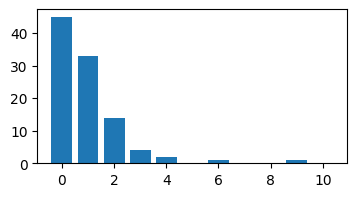

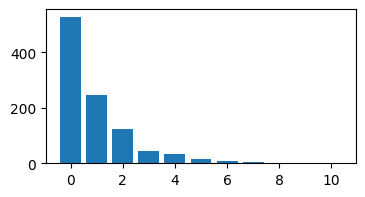

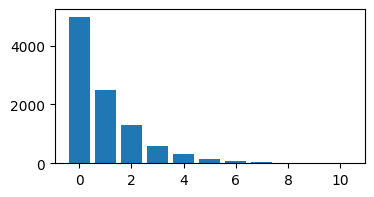

In [1]:
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt

# 硬币
def isFront():
    return rd.choice([True, False])

# St. Petersburg question
def saint():
    k = 0
    while isFront() and k < 10:
        k += 1
    return k

# k次实验
def kSaint(k):
    result = [0 for i in range(11)]
    for i in range(k):
        positive = saint()
        result[positive] += 1
    return result

# 作图
def kSaintPlot(k):
    result = kSaint(k)
    plt.figure(figsize=(4, 2))
    plt.bar([i for i in range(len(result))],result)
    plt.show()

kSaintPlot(100)
kSaintPlot(1000)
kSaintPlot(10000)

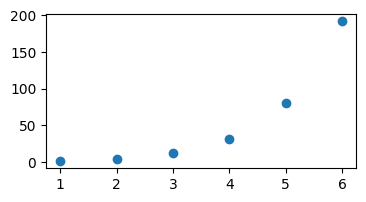

In [2]:
def earn():
    earn = 0
    k = 1
    earn_values = []  
    while k < 7:
        earn = k * 2 ** (k - 1)
        earn_values.append(earn)
        k += 1

    plt.figure(figsize=(4, 2))
    x_values = list(range(1, len(earn_values) + 1))
    plt.scatter(x_values, earn_values)
    plt.show()

earn()

#### 3.

$$ \int_{-\infty}^\infty g(x) dx = 0.1c+0.6*2c+0.3*c/3=1\Rightarrow c = \frac{5}{7} $$

当y取值为$c = \frac{5}{7}$时，在[0,0.1)之间随机取一个数即得到对应的样本，同理，当y为2c,c/3时，在区间[0.1,0.7),[0,7,1)随机取一个数即为样本

#### 5

$\int_{-\infty}^\infty cg(t)dt = c(\int_{-2}^2\frac{8}{7}+\frac{118}{63}x^2-\frac{74}{63}x^4+\frac{10}{63}x^6)dx = c\frac{2}{63} (36x+\frac{59}{3}x^3-\frac{37}{5}x^5+\frac{5}{7}x^7)|_{-2}^2=c\frac{35264}{6615}=1\Rightarrow c = \frac{6615}{35264}$

显然偶函数$f(x)$在[-2,0]递减，[0,2]递增，其在 $ [0,\infty] $ 的反函数显然存在，记为$f^{-1}(x)=\begin{cases} 0 & x<-2\\ g_1^{-1}(x) & x\in [-2，0]\\g_2^{-1}(x) & x\in (0,2] \\0 & x>2  \end{cases}$,那么取 $h(x)=\begin{cases} 0 & x<-2\\ - g_1^{-1}(x) & x\in [-2，0]\\g_2^{-1}(x) & x\in (0,2] \\0 & x>2  \end{cases}$,再取一$(-\infty,+\infty)$的均匀分布$X$，那么$h(X)$即为所需抽样

#### 7

不妨记$A = (a_{ij})_{2\times 2},\mu = (\mu_1,\mu_2)^T$那么$Y_1$~$N(\mu_1,a_{11}^2+a_{12}^2)$,$Y_2$~$N(\mu_2,a_{21}^2+a_{22}^2)$

其概率密度函数为$p(y_1,y_2) = \frac{1}{2\pi \sqrt{(a_{11}^2+a_{12}^2)(a_{21}^2+a_{22}^2)}}\exp\{-\frac{1}{2}[\frac{(x_1-\mu_1)^2}{a_{11}^2+a_{12}^2}+\frac{(x_2-\mu_2)^2}{a_{21}^2+a_{22}^2}]\}$





### Gibbs采样模拟圆周率随机投点

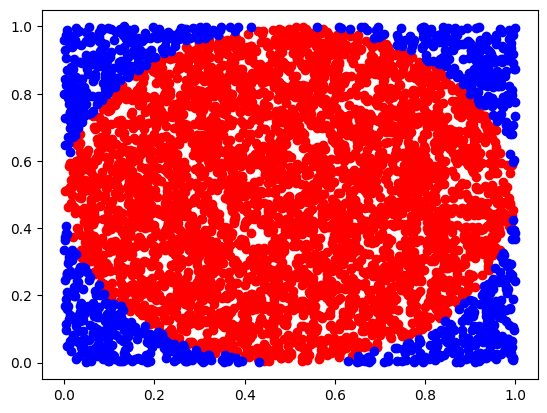

3.1744


In [18]:
def Gibbs_pi(num):
    def In_cir(x,y):
        result = math.sqrt((x-0.5)**2 + (y-0.5)**2)
        return result < 0.5
    
    n = 0
    fig, ax = plt.subplots() 
    inLstX, inlstY, outLstX, outLstY = [], [], [], []
    for _ in range(num):
        x, y = rd.uniform(0,1), rd.uniform(0,1)
        if (In_cir(x,y)):
            n += 1
            inLstX.append(x)
            inlstY.append(y)
        else:
            outLstX.append(x)
            outLstY.append(y)
    plt.scatter(inLstX,inlstY,color = 'red')
    plt.scatter(outLstX,outLstY,color = 'blue')
    plt.show()
    return 4*n/num
    
print(Gibbs_pi(5000))          


        

### 蓄水池算法

1.先准备一个大小为m的返回结果ans，即蓄水池。

2.对于先来到的前m个数，先来先得，直接丢入蓄水池中，占好位置。

3.对于后面来到的第cnt（cnt>m）个数，有m/cnt的概率保留，如果保留，则用其替换出蓄水池中的任意一个数。

对于样本中的每个数来说，保留在蓄水池中的概率都相同

In [54]:
sample = [rd.randint(1,100) for _ in range(100)]
def reserSamp(lst, m):
    if m >= len(lst):
        return sample
    else:
        cnt = len(lst) - m
        mindex = list(range(m))
        def isSave(m):
            return rd.uniform(0,1) < m/cnt
        def swap(lst, n):
            del lst[rd.choice(mindex)]
            lst.append(n)
            return 0
        
        ans = [lst[i] for i in range(m)]
        for i in range(m,len(lst)):
            if isSave(cnt):
                swap(ans, lst[i])
        return ans
    
print(reserSamp(sample,5))
     

[29, 82, 68, 22, 73]
